In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt # showing and rendering figures

In [ ]:
import zipfile

In [ ]:
!unzip "/content/drive/MyDrive/train_1.zip" -d "/content/drive/MyDrive/Diabetic_Retinopathy_Detection/"

Archive:  /content/drive/MyDrive/train_1.zip
  inflating: /content/drive/MyDrive/Diabetic_Retinopathy_Detection/train_1/84_left.jpeg  
  inflating: /content/drive/MyDrive/Diabetic_Retinopathy_Detection/train_1/84_right.jpeg  
  inflating: /content/drive/MyDrive/Diabetic_Retinopathy_Detection/train_1/842_left.jpeg  
  inflating: /content/drive/MyDrive/Diabetic_Retinopathy_Detection/train_1/842_right.jpeg  
  inflating: /content/drive/MyDrive/Diabetic_Retinopathy_Detection/train_1/8421_right.jpeg  
  inflating: /content/drive/MyDrive/Diabetic_Retinopathy_Detection/train_1/8424_left.jpeg  
  inflating: /content/drive/MyDrive/Diabetic_Retinopathy_Detection/train_1/8424_right.jpeg  
  inflating: /content/drive/MyDrive/Diabetic_Retinopathy_Detection/train_1/8425_left.jpeg  
  inflating: /content/drive/MyDrive/Diabetic_Retinopathy_Detection/train_1/8425_right.jpeg  
  inflating: /content/drive/MyDrive/Diabetic_Retinopathy_Detection/train_1/8426_left.jpeg  
  inflating: /content/drive/MyDrive/

In [ ]:
import os

folder_path = "/content/drive/MyDrive/Diabetic_Retinopathy_Detection/"

# Get all entries (files and subfolders) in the folder
entries = os.listdir(folder_path)

# Print all entries in the folder
for entry in entries:
    print(entry)

train_1


In [ ]:
base_image_dir = os.path.join('/content/drive/MyDrive/Diabetic_Retinopathy_Detection/train_1')
train_df = pd.read_csv(os.path.join( '/content/drive/MyDrive/trainLabels.csv'))
train_df

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1
...,...,...
35121,44347_right,0
35122,44348_left,0
35123,44348_right,0
35124,44349_left,0


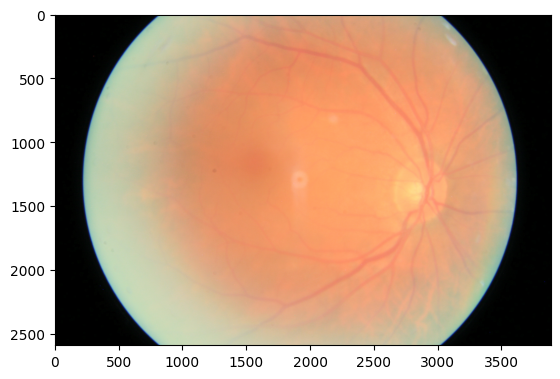

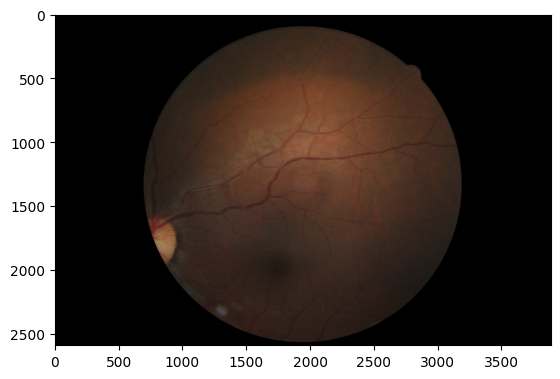

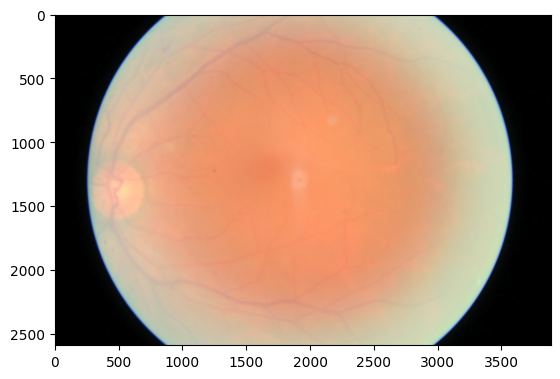

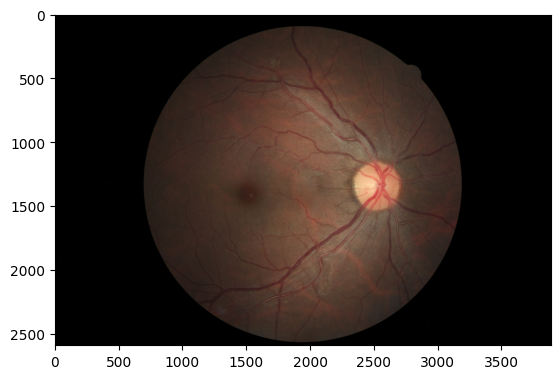

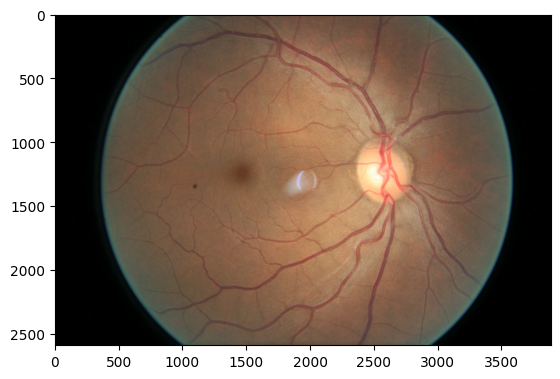

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

folder_path = "/content/drive/MyDrive/Diabetic_Retinopathy_Detection/train_1"
counter = 0  # to keep track of the number of images displayed

for filename in os.listdir(folder_path):
    if counter == 5:  # display only 5 images
        break
    img_path = os.path.join(folder_path, filename)
    img = Image.open(img_path)
    plt.imshow(img)
    plt.show()
    counter += 1


In [ ]:
base_image_dir = os.path.join('/content/drive/MyDrive/Diabetic_Retinopathy_Detection/train_1/')
train_df = pd.read_csv(os.path.join( '/content/drive/MyDrive/trainLabels.csv'))
train_df['PatientId'] = train_df['image'].map(lambda x: x.split('_')[0])
train_df['path'] = train_df['image'].map(lambda x: os.path.join(base_image_dir,
                                                         '{}.jpeg'.format(x)))
train_df['exists'] = train_df['path'].map(os.path.exists)
print(train_df['exists'].sum(), 'images found of', train_df.shape[0], 'total')
train_df['eye'] = train_df['image'].map(lambda x: 1 if x.split('_')[-1]=='left' else 0)
from keras.utils.np_utils import to_categorical
train_df['level_cat'] = train_df['level'].map(lambda x: to_categorical(x, 1+train_df['level'].max()))

train_df.dropna(inplace = True)
train_df = train_df[train_df['exists']]
train_df.sample(3)

1427 images found of 35126 total


,image,level,PatientId,path,exists,eye,level_cat
7894,9900_left,0,9900,/content/drive/MyDrive/Diabetic_Retinopathy_De...,True,1,"[1.0, 0.0, 0.0, 0.0, 0.0]"
7054,8839_left,0,8839,/content/drive/MyDrive/Diabetic_Retinopathy_De...,True,1,"[1.0, 0.0, 0.0, 0.0, 0.0]"
7829,9826_right,0,9826,/content/drive/MyDrive/Diabetic_Retinopathy_De...,True,0,"[1.0, 0.0, 0.0, 0.0, 0.0]"


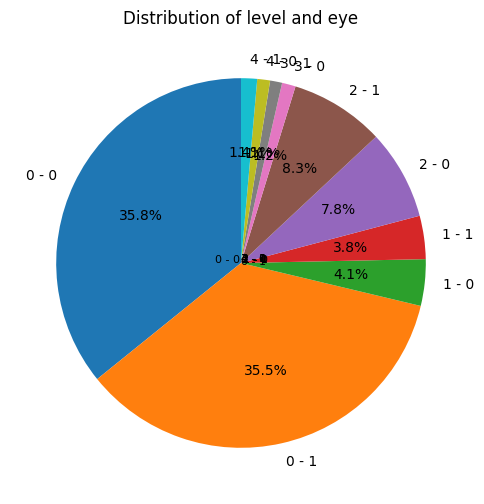

In [ ]:
import matplotlib.pyplot as plt

# create a subset of the dataframe to count the number of observations for each combination of level and eye
count_df = train_df.groupby(['level', 'eye']).size().reset_index(name='count')

# create a list of labels for each pie slice
labels = ['{} - {}'.format(row['level'], row['eye']) for _, row in count_df.iterrows()]

# create a list of counts for each pie slice
counts = count_df['count'].tolist()

# create the pie chart
fig, ax = plt.subplots(figsize=(8, 6))
wedges, _, autotexts = ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10})

# adjust the label positions to prevent overlapping
bbox_props = dict(boxstyle='square,pad=0.3', fc='w', ec='k', lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va='center')
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1) / 2. + p.theta1
    y = 1.1 * np.sin(np.deg2rad(ang))
    x = 1.1 * np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(labels[i], xy=(0, 0), xytext=(x, y), fontsize=8, textcoords='offset points', ha=horizontalalignment)

# add a title to the chart
plt.title('Distribution of level and eye')

# display the chart
plt.show()


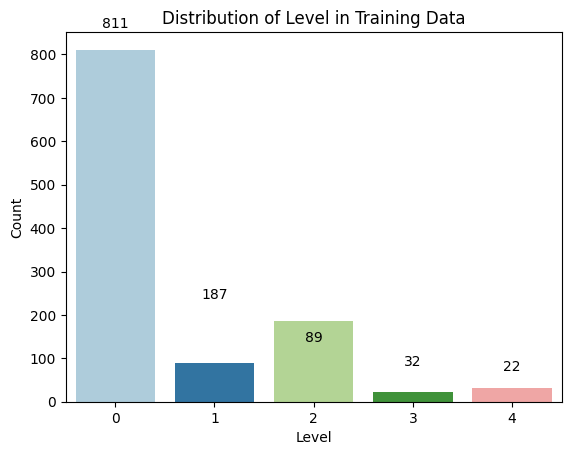

In [ ]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(train_df,test_size=0.2) # Here we will perform an 80%/20% split of the dataset, with stratification to keep similar distribution in validation set
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a countplot of the 'level' column from the train_df DataFrame
sns.countplot(data=train_df, x='level', palette='Paired')
plt.xlabel('Level')
plt.ylabel('Count')
plt.title('Distribution of Level in Training Data')

# Add the counts for each bar to the plot
for i in range(len(train_df['level'].unique())):
    count = train_df['level'].value_counts().values[i]
    plt.text(i, count+50, count, horizontalalignment='center')

# Display the plot
plt.show()


In [ ]:
def balance_data(class_size,df):
    train_df = df.groupby(['level']).apply(lambda x: x.sample(class_size, replace = True)).reset_index(drop = True)
    train_df = train_df.sample(frac=1).reset_index(drop=True)
    print('New Data Size:', train_df.shape[0], 'Old Size:', df.shape[0])
    train_df['level'].hist(figsize = (10, 5))
    return train_df

New Data Size: 4055 Old Size: 1141


<ipython-input-9-4506c848dde7>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=train_df, x='level', palette='Paired', bins=5)


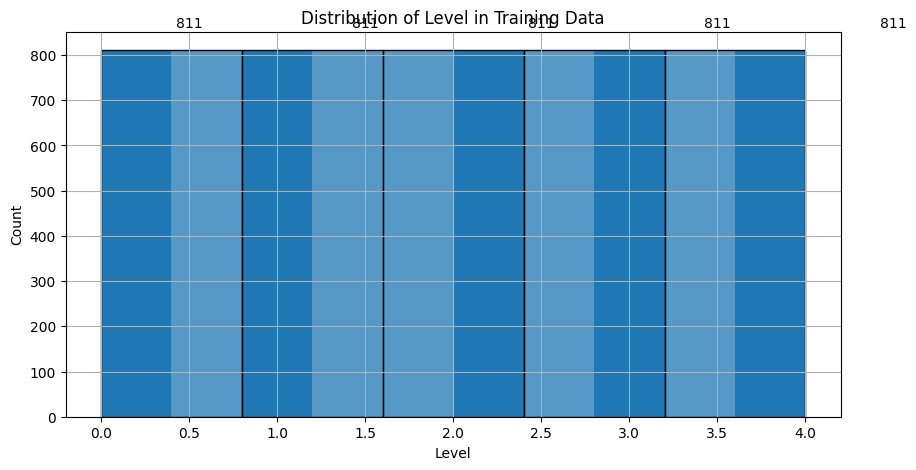

In [ ]:
train_df = balance_data(train_df.pivot_table(index='level', aggfunc=len).max().max(),train_df) # I will oversample such that all classes have the same number of images as the maximum
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a histogram of the 'level' column from the train_df DataFrame
sns.histplot(data=train_df, x='level', palette='Paired', bins=5)
plt.xlabel('Level')
plt.ylabel('Count')
plt.title('Distribution of Level in Training Data')

# Add the counts for each bin to the plot
for i in range(5):
    count = sum((train_df['level'] >= i*1) & (train_df['level'] < (i+1)*1))
    plt.text(i+0.5, count+50, count, horizontalalignment='center')

# Display the plot
plt.show()


In [ ]:
df = pd.concat([train_df,val_df]) #beginning of this dataframe is the oversampled training set, end is the validation set
len(df)

4341

In [ ]:
listing = os.listdir("/content/drive/MyDrive/Diabetic_Retinopathy_Detection/train_1/") 

np.size(listing)

1427

In [ ]:
trainLabels = pd.read_csv("/content/drive/MyDrive/trainLabels.csv")
trainLabels.head()

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1


In [ ]:
from PIL import Image
from keras.preprocessing import image
import os
import numpy as np
import pandas as pd

In [ ]:
img_rows, img_cols = 200, 200

immatrix = []
imlabel = []

for file in listing:
    base = os.path.basename("/content/drive/MyDrive/Diabetic_Retinopathy_Detection/train_1/" + file)
    fileName = os.path.splitext(base)[0]
    imlabel.append(trainLabels.loc[trainLabels.image==fileName, 'level'].values[0])
    im = Image.open("/content/drive/MyDrive/Diabetic_Retinopathy_Detection/train_1/" + file)   
    img = im.resize((img_rows,img_cols))
    gray = img.convert('L')
    immatrix.append(np.array(gray).flatten())

In [ ]:
immatrix = np.asarray(immatrix)
imlabel = np.asarray(imlabel)
from sklearn.utils import shuffle

data,Label = shuffle(immatrix,imlabel, random_state=2)
train_data = [data,Label]
type(train_data)

list

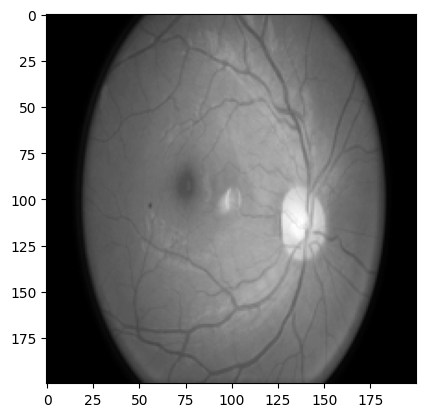

In [ ]:
import matplotlib.pyplot as plt
import matplotlib

img=immatrix[167].reshape(img_rows,img_cols)
plt.imshow(img)
plt.imshow(img,cmap='gray')

In [ ]:

(X, y) = (train_data[0],train_data[1])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print(X_train.shape)
print(X_test.shape)
X_train = X_train.reshape(X_train.shape[0], img_cols, img_rows, 1)
X_test = X_test.reshape(X_test.shape[0], img_cols, img_rows, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

(1141, 40000)
(286, 40000)
X_train shape: (1141, 200, 200, 1)
1141 train samples
286 test samples


In [ ]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train, 5)
Y_test = np_utils.to_categorical(y_test, 5)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Define the properties for data augmentation
traindatagenerator = ImageDataGenerator(
    rescale=1./255,             # Rescale pixel values to [0, 1]
    rotation_range=20,          # Randomly rotate images by up to 20 degrees
    width_shift_range=0.1,      # Randomly shift images horizontally by up to 10% of the width
    height_shift_range=0.1,     # Randomly shift images vertically by up to 10% of the height
    shear_range=0.1,            # Apply random shearing transformation
    zoom_range=0.1,             # Apply random zoom transformation
    horizontal_flip=True,       # Randomly flip images horizontally
    vertical_flip=False,        # Don't randomly flip images vertically
    fill_mode='nearest'         # Use nearest neighbor method to fill in missing pixels
)

# Define the properties for the validation data generator
validationdatagenerator = ImageDataGenerator(
    rescale=1./255              # Rescale pixel values to [0, 1]
)

# Set the batch size and create the generators
batchsize = 8
train_generator = traindatagenerator.flow(X_train, Y_train, batch_size=batchsize) 
validation_generator = validationdatagenerator.flow(X_test, Y_test, batch_size=batchsize)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.applications import ResNet50


# Load the ResNet50 model with pre-trained weights
resnet = ResNet50(weights=None, include_top=False, input_shape=(200,200,1))

# Create a new model by adding some Convolutional and Pooling layers on top of the base model
model = Sequential()
model.add(resnet)
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


# Add some fully connected layers
model.add(Flatten())
model.add(Dense(1028, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())

# Create an output layer
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23581440  
                                                                 
 conv2d_3 (Conv2D)           (None, 5, 5, 64)          1179712   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 2, 2, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 512)               131584    
                                                                 
 batch_normalization_6 (Batc  (None, 512)              2048      
 hNormalization)                                      

**Model training**

In [ ]:
history=model.fit(train_generator, steps_per_epoch=int(len(X_train)/64), epochs=50, validation_data=validation_generator, validation_steps=int(len(X_test)/64))

Epoch 1/50
17/17 [==============================] - 46s 188ms/step - loss: 2.0878 - accuracy: 0.3015 - val_loss: 1.3640 - val_accuracy: 0.7188
Epoch 2/50
17/17 [==============================] - 2s 110ms/step - loss: 1.4313 - accuracy: 0.5147 - val_loss: 1.2267 - val_accuracy: 0.7188
Epoch 3/50
17/17 [==============================] - 2s 109ms/step - loss: 1.3185 - accuracy: 0.6029 - val_loss: 1.4869 - val_accuracy: 0.6562
Epoch 4/50
17/17 [==============================] - 2s 109ms/step - loss: 1.0761 - accuracy: 0.6985 - val_loss: 1.2801 - val_accuracy: 0.5938
Epoch 5/50
17/17 [==============================] - 2s 114ms/step - loss: 0.9333 - accuracy: 0.7721 - val_loss: 1.3116 - val_accuracy: 0.5938
Epoch 6/50
17/17 [==============================] - 2s 115ms/step - loss: 0.9945 - accuracy: 0.7206 - val_loss: 1.0863 - val_accuracy: 0.6562
Epoch 7/50
17/17 [==============================] - 2s 111ms/step - loss: 1.0892 - accuracy: 0.6691 - val_loss: 0.7656 - val_accuracy: 0.7500
Epoch

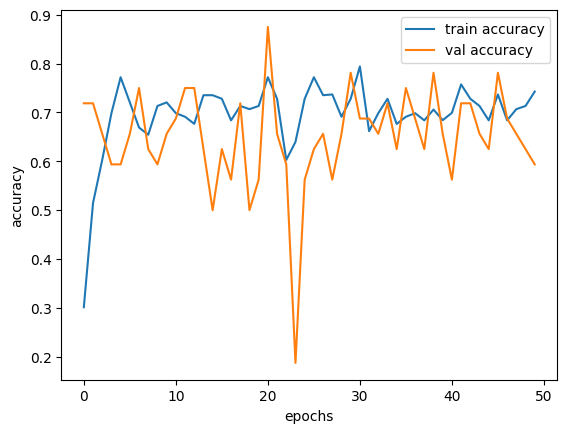

In [ ]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

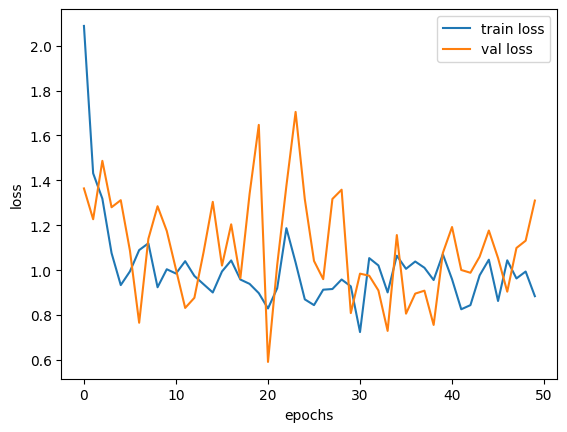

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the validation set
y_pred = model.predict(validation_generator)
y_pred = np.round(y_pred)

# Calculate evaluation metrics
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred,average = 'micro')
recall = recall_score(Y_test, y_pred,average = 'micro')
f1 = f1_score(Y_test, y_pred,average = 'micro')

print('Accuracy: {:.2f}'.format(accuracy))
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1-score: {:.2f}'.format(f1))


Accuracy: 0.889
Precision:  0.861
Recall: 0.856
F1-score:  0.882


In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import scikitplot as skplt

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

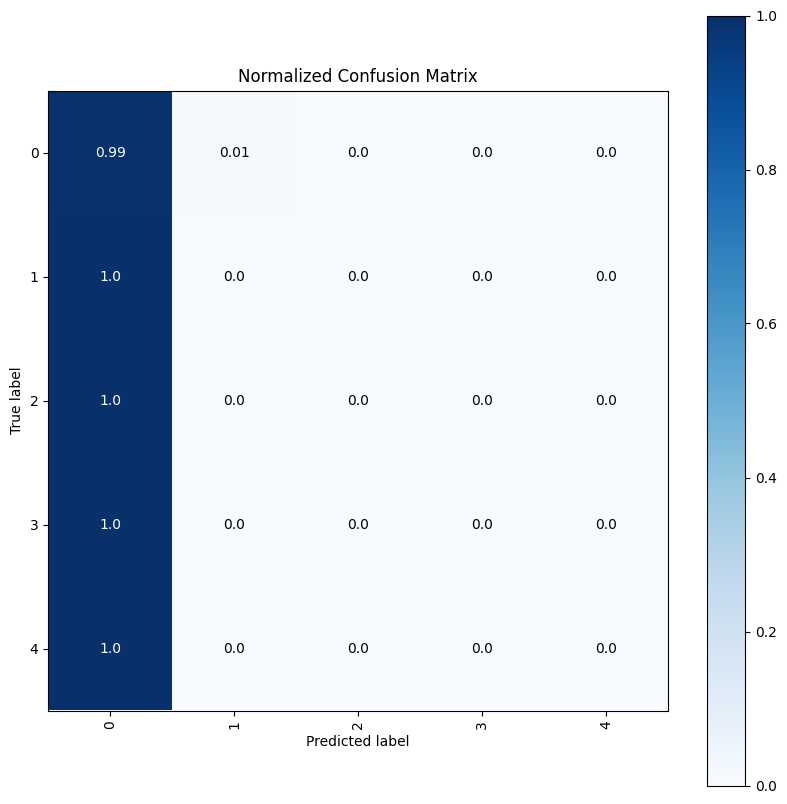

In [ ]:


cm=confusion_matrix(y_test,y_pred)

skplt.metrics.plot_confusion_matrix(y_test,y_pred,normalize=True,x_tick_rotation=90,figsize=(10,10),cmap='Blues')

In [ ]:
cm

array([[190,   1,   0,   0,   0],
       [ 22,   0,   0,   0,   0],
       [ 55,   0,   0,   0,   0],
       [  7,   0,   0,   0,   0],
       [ 11,   0,   0,   0,   0]])

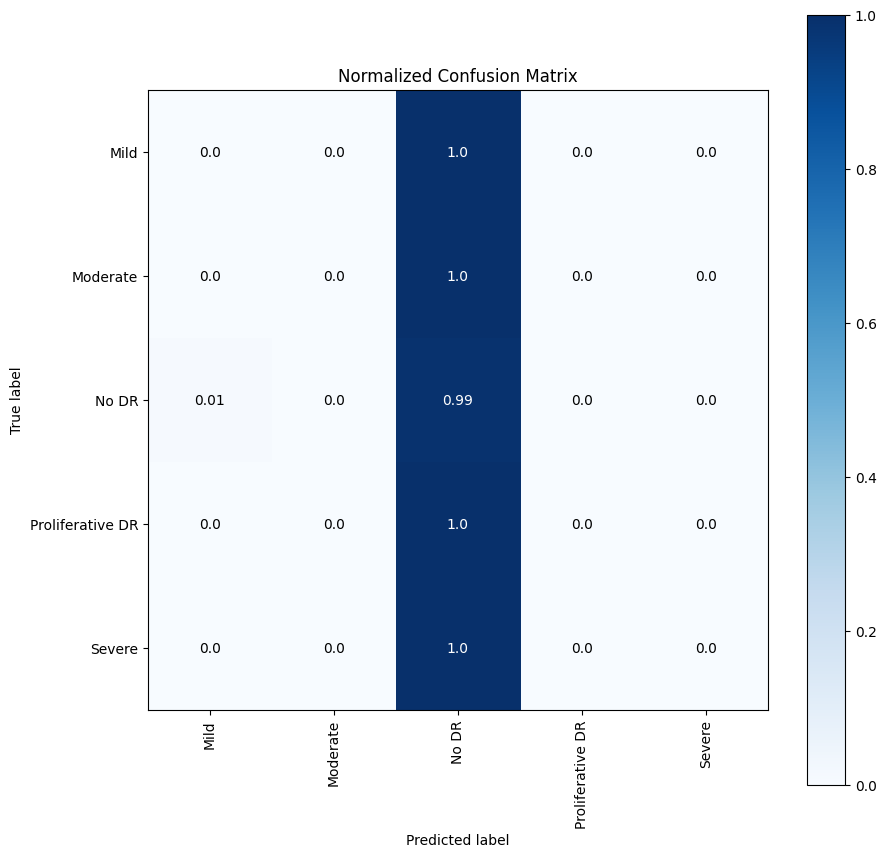

In [ ]:


# define labels
labels = ["No DR","Mild","Moderate","Severe","Proliferative DR"]
# convert y_pred and val_labels to object type
y_pred_obj = np.array([labels[i] for i in y_pred], dtype='object')
val_labels_obj = np.array([labels[i] for i in y_test], dtype='object')

# plot confusion matrix
skplt.metrics.plot_confusion_matrix(val_labels_obj, y_pred_obj, normalize=True, x_tick_rotation=90, figsize=(10,10), cmap='Blues')

# display the confusion matrix
plt.show()
